EXPLORATORY DATA ANALYSIS AND INTRO



Goal:

1. Investigate top-paying roles and skills in the data science industry.
2. Use Python to explore a real-life dataset on job postings.
3. For job-seekers: use these insights to help find the best job oportunities.

Final Deliverables:

. Create Jupyter Notebooks (showcasing core skills in Python).
. Create a summary page (via README.md) capturing your findings.
. Share this project via GitHub & LinkedIn.

Questions to Answer:

1. What are the most demanded skills for the top 3 most popular data roles?
2. How are in-demand skills trending for Data Analysts?
3. How well do jobs and skills pay for Data Analysts?
4. What is the most high-demanded and best-payed skill for Data Analysts? 


EXPLORATORY DATA ANALYSIS

Roles to explore:

In [30]:
# Import Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

Filter for Spain Data Analyst roles

In [31]:
df_DA_SP = df[(df['job_country'] == 'Spain') & (df['job_title_short'] == 'Data Analyst')]

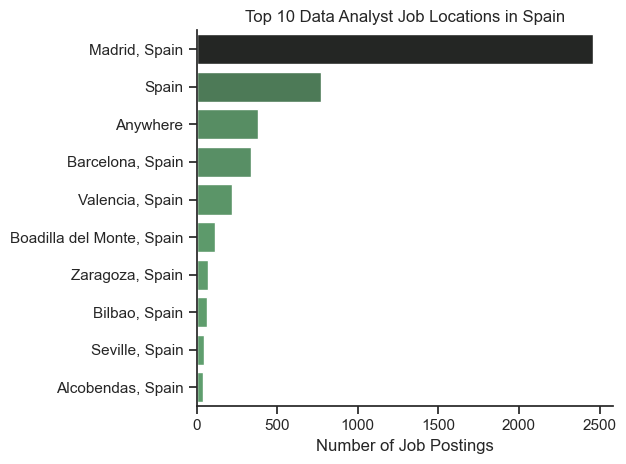

In [32]:
df_plot = df_DA_SP['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:g_r', legend=False)
sns.despine()
plt.title('Top 10 Data Analyst Job Locations in Spain')
plt.xlabel('Number of Job Postings')
plt.ylabel('')
plt.tight_layout()
plt.show()


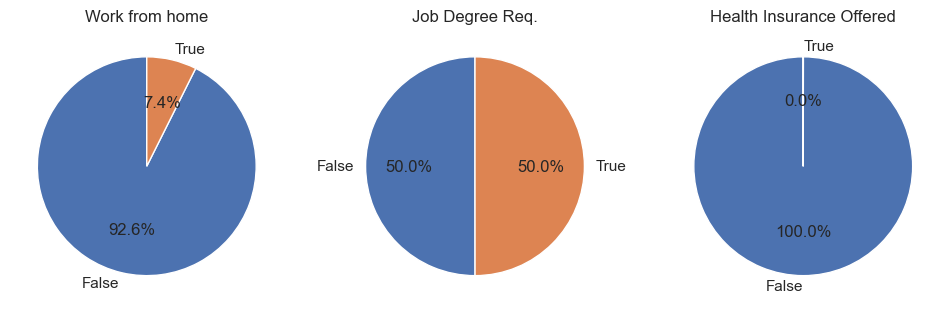

In [33]:
dict_column = {
    'job_work_from_home': 'Work from home',
    'job_no_degree_mention': 'Job Degree Req.',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12, 5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_SP[column].value_counts(), startangle=90, autopct='%1.1f%%', labels=['False', 'True'])
    ax[i].set_title(title)

plt.show()

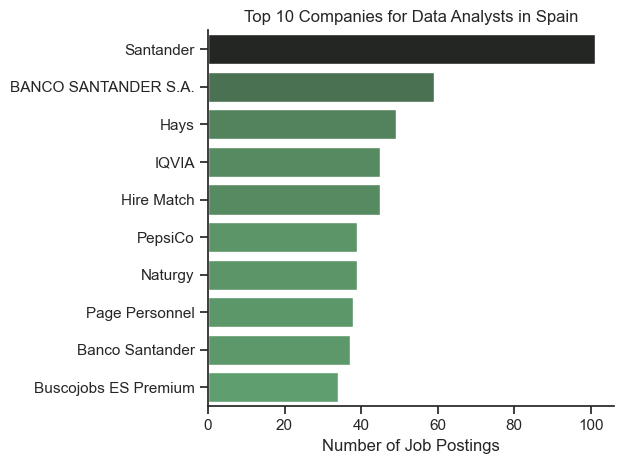

In [36]:
df_plot = df_DA_SP['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:g_r', legend=False)
sns.despine()
plt.title('Top 10 Companies for Data Analysts in Spain')
plt.xlabel('Number of Job Postings')
plt.ylabel('')
plt.tight_layout()
plt.show()